In [1]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_df = pd.read_csv('./datasets/dataset_50_2.5.csv', header=None)

print(data_df)

            0         1         2         3         4         5         6    \
0     -6.000000 -6.000000 -6.000000 -6.000000 -6.000000 -6.000000 -6.000000   
1     -5.056885 -6.000000 -6.000000 -6.000000 -6.000000 -5.172044 -6.000000   
2     -5.908984 -6.000000 -6.000000 -6.000000 -6.000000 -6.000000 -6.000000   
3     -6.000000 -6.000000 -5.283560 -5.862354 -6.000000 -6.000000 -5.063055   
4     -5.982080 -5.695964 -6.000000 -6.000000 -6.000000 -5.510071 -6.000000   
...         ...       ...       ...       ...       ...       ...       ...   
22584 -2.313599 -2.000000 -2.000000 -2.000000 -2.000000 -1.000000 -1.000000   
22585 -1.493705 -1.000000 -1.000000  0.000000  0.000000  0.000000  0.000000   
22586  0.000000  0.000000  0.000000  0.000000 -1.000000 -1.000000  0.000000   
22587  0.000000  0.000000  0.000000  0.720006  0.707711 -0.721697 -4.587960   
22588 -4.646136 -5.000000 -4.175241 -3.000000 -3.000000 -3.000000 -2.171858   

            7         8         9    ...  740  741 

In [2]:
label_df = pd.read_csv('./dataset_labels_50_2.5.csv')
print(label_df)

      user    device     gt
0        a  nexus4_1  stand
1        a  nexus4_1  stand
2        a  nexus4_1  stand
3        a  nexus4_1  stand
4        a  nexus4_1  stand
...    ...       ...    ...
22584    i  s3mini_2   walk
22585    i  s3mini_2   walk
22586    i  s3mini_2   walk
22587    i  s3mini_2   walk
22588    i  s3mini_2   walk

[22589 rows x 3 columns]


In [3]:
dataset_df = pd.concat([data_df,label_df], axis=1)
print(dataset_df)

              0         1         2         3         4         5         6  \
0     -6.000000 -6.000000 -6.000000 -6.000000 -6.000000 -6.000000 -6.000000   
1     -5.056885 -6.000000 -6.000000 -6.000000 -6.000000 -5.172044 -6.000000   
2     -5.908984 -6.000000 -6.000000 -6.000000 -6.000000 -6.000000 -6.000000   
3     -6.000000 -6.000000 -5.283560 -5.862354 -6.000000 -6.000000 -5.063055   
4     -5.982080 -5.695964 -6.000000 -6.000000 -6.000000 -5.510071 -6.000000   
...         ...       ...       ...       ...       ...       ...       ...   
22584 -2.313599 -2.000000 -2.000000 -2.000000 -2.000000 -1.000000 -1.000000   
22585 -1.493705 -1.000000 -1.000000  0.000000  0.000000  0.000000  0.000000   
22586  0.000000  0.000000  0.000000  0.000000 -1.000000 -1.000000  0.000000   
22587  0.000000  0.000000  0.000000  0.720006  0.707711 -0.721697 -4.587960   
22588 -4.646136 -5.000000 -4.175241 -3.000000 -3.000000 -3.000000 -2.171858   

              7         8         9  ...  743  744 

## Removing Sit and Stand activities to perform orientation invariant trasformation

In [4]:
# ATTENTION DATASET CHANGE
dataset_df.loc[dataset_df['gt'] == "stand", 'gt'] = 'no_activity'
dataset_df.loc[dataset_df['gt'] == "sit", 'gt'] = 'no_activity'
print(dataset_df)

              0         1         2         3         4         5         6  \
0     -6.000000 -6.000000 -6.000000 -6.000000 -6.000000 -6.000000 -6.000000   
1     -5.056885 -6.000000 -6.000000 -6.000000 -6.000000 -5.172044 -6.000000   
2     -5.908984 -6.000000 -6.000000 -6.000000 -6.000000 -6.000000 -6.000000   
3     -6.000000 -6.000000 -5.283560 -5.862354 -6.000000 -6.000000 -5.063055   
4     -5.982080 -5.695964 -6.000000 -6.000000 -6.000000 -5.510071 -6.000000   
...         ...       ...       ...       ...       ...       ...       ...   
22584 -2.313599 -2.000000 -2.000000 -2.000000 -2.000000 -1.000000 -1.000000   
22585 -1.493705 -1.000000 -1.000000  0.000000  0.000000  0.000000  0.000000   
22586  0.000000  0.000000  0.000000  0.000000 -1.000000 -1.000000  0.000000   
22587  0.000000  0.000000  0.000000  0.720006  0.707711 -0.721697 -4.587960   
22588 -4.646136 -5.000000 -4.175241 -3.000000 -3.000000 -3.000000 -2.171858   

              7         8         9  ...  743  744 

In [5]:
dataset_one_hot_df = pd.get_dummies(dataset_df, columns=['gt'])
dfprint(dataset_one_hot_df)

              0         1         2         3         4         5         6  \
0     -6.000000 -6.000000 -6.000000 -6.000000 -6.000000 -6.000000 -6.000000   
1     -5.056885 -6.000000 -6.000000 -6.000000 -6.000000 -5.172044 -6.000000   
2     -5.908984 -6.000000 -6.000000 -6.000000 -6.000000 -6.000000 -6.000000   
3     -6.000000 -6.000000 -5.283560 -5.862354 -6.000000 -6.000000 -5.063055   
4     -5.982080 -5.695964 -6.000000 -6.000000 -6.000000 -5.510071 -6.000000   
...         ...       ...       ...       ...       ...       ...       ...   
22584 -2.313599 -2.000000 -2.000000 -2.000000 -2.000000 -1.000000 -1.000000   
22585 -1.493705 -1.000000 -1.000000  0.000000  0.000000  0.000000  0.000000   
22586  0.000000  0.000000  0.000000  0.000000 -1.000000 -1.000000  0.000000   
22587  0.000000  0.000000  0.000000  0.720006  0.707711 -0.721697 -4.587960   
22588 -4.646136 -5.000000 -4.175241 -3.000000 -3.000000 -3.000000 -2.171858   

              7         8         9  ...  747  748 

## SPLITTING DATASET IN TRAIN AND TEST SET

In [6]:
# Keep 20% of the data out for validation
### START CODE HERE ### (1 line)
train_reference_df, val_reference_df = train_test_split(dataset_one_hot_df, test_size=0.2, shuffle=True, random_state=123)
### END CODE HERE ###


def print_dataset_statistics(train_reference_df, val_reference_df):

    # Count the elements in the sets
    num_train_data_no_activity = sum(train_reference_df['gt_no_activity'] == 1)
    num_train_data_walk = sum(train_reference_df['gt_walk'] == 1)
    num_train_data_bike = sum(train_reference_df['gt_bike'] == 1)
    num_train_data_stairs_up = sum(train_reference_df['gt_stairsup'] == 1)
    num_train_data_stairs_down = sum(train_reference_df['gt_stairsdown'] == 1)

    num_val_data_no_activity = sum(val_reference_df['gt_no_activity'] == 1)
    num_val_data_walk = sum(val_reference_df['gt_walk'] == 1)
    num_val_data_bike = sum(val_reference_df['gt_bike'] == 1)
    num_val_data_stairs_up = sum(val_reference_df['gt_stairsup'] == 1)
    num_val_data_stairs_down = sum(val_reference_df['gt_stairsdown'] == 1)



    print('TRAIN SET')
    print('\tNo activity:\t{} ({:.2f}%)'.format(num_train_data_no_activity, 100 * num_train_data_no_activity / len(train_reference_df)))
    print('\tWalk:\t\t{} ({:.2f}%)'.format(num_train_data_walk, 100 * num_train_data_walk / len(train_reference_df)))
    print('\tBike:\t\t{} ({:.2f}%)'.format(num_train_data_bike, 100 * num_train_data_bike / len(train_reference_df)))
    print('\tStairs up:\t{} ({:.2f}%)'.format(num_train_data_stairs_up, 100 * num_train_data_stairs_up / len(train_reference_df)))
    print('\tStairs down:\t{} ({:.2f}%)'.format(num_train_data_stairs_down, 100 * num_train_data_stairs_down / len(train_reference_df)))


    print('VALIDATION SET')
    print('\tNo activity:\t{} ({:.2f}%)'.format(num_val_data_no_activity, 100 * num_val_data_no_activity / len(val_reference_df)))
    print('\tWalk:\t\t{} ({:.2f}%)'.format(num_val_data_walk, 100 * num_val_data_walk / len(val_reference_df)))
    print('\tBike:\t\t{} ({:.2f}%)'.format(num_val_data_bike, 100 * num_val_data_bike / len(val_reference_df)))
    print('\tStairs up:\t{} ({:.2f}%)'.format(num_val_data_stairs_up, 100 * num_val_data_stairs_up / len(val_reference_df)))
    print('\tStairs down:\t{} ({:.2f}%)'.format(num_val_data_stairs_down, 100 * num_val_data_stairs_down / len(val_reference_df)))


print_dataset_statistics(train_reference_df, val_reference_df)


TRAIN SET
	No activity:	6662 (36.87%)
	Walk:		3991 (22.09%)
	Bike:		2533 (14.02%)
	Stairs up:	2735 (15.13%)
	Stairs down:	2150 (11.90%)
VALIDATION SET
	No activity:	1672 (37.01%)
	Walk:		1018 (22.53%)
	Bike:		623 (13.79%)
	Stairs up:	686 (15.18%)
	Stairs down:	519 (11.49%)


In [7]:
print(train_reference_df)

         0         1    2        3         4    5         6         7  \
6785  -3.0 -3.000000 -3.0 -3.00000 -2.091919 -2.0 -2.829190 -3.000000   
20108  5.0  5.000000  5.0  5.00000  5.000000  5.0  5.000000  5.000000   
17854 -5.0 -4.733199 -4.0 -4.00000 -4.000000 -3.0 -3.000000 -3.214111   
16603  4.0  4.000000  4.0  4.00000  4.000000  4.0  4.000000  4.000000   
14823 -1.0 -1.000000 -1.0 -1.00000 -1.000000 -1.0 -1.153836 -2.000000   
...    ...       ...  ...      ...       ...  ...       ...       ...   
15377 -1.0 -1.000000 -1.0 -1.00000 -1.000000 -1.0 -1.000000 -1.000000   
21602  5.0  5.000000  5.0  5.00000  5.000000  5.0  5.000000  5.000000   
17730 -5.0 -5.000000 -5.0 -4.45692 -4.000000 -3.0 -3.998675 -4.000000   
15725 -1.0 -1.000000 -1.0 -2.00000 -5.176727 -6.0 -7.000000 -5.000000   
19966  0.0  0.000000  0.0  0.00000  0.000000  0.0  0.000000  0.000000   

              8         9  ...  747  748  749  user    device  gt_bike  \
6785  -4.000000 -4.818164  ...  0.0  0.0  0.0    

### Defining orientation independent transformation

<Figure size 432x288 with 0 Axes>

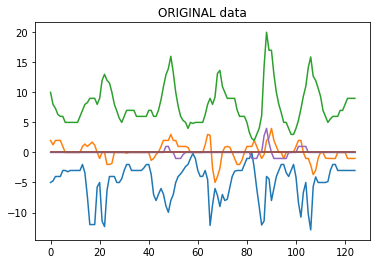

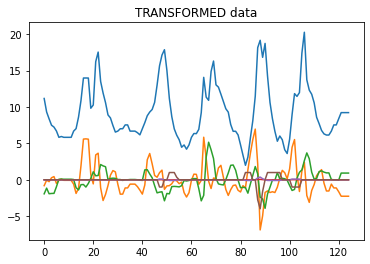

<Figure size 432x288 with 0 Axes>

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def orientation_independent_transformation(data):

    data_transformed = []

    for sample in data:
        ax = sample[0]
        ay = sample[1]
        az = sample[2]
        gx = sample[3]
        gy = sample[4]
        gz = sample[5]

        gravity_vector = np.array([[np.mean(ax), np.mean(ay), np.mean(az)]]).T
        
        vertical_versor = gravity_vector / np.linalg.norm(gravity_vector, ord=2, axis=0) #(3,1)

        A = np.array([ax, ay, az]) # (3,125)
        G = np.array([gx, gy, gz]) # (3,125)

        # project data onto the vertical versor
        projected_vertical_acc = np.matmul(A.T, vertical_versor) #(125,1)
        projected_vertical_gyro = np.matmul(G.T, vertical_versor) #(125,1)

        A_floor = A - np.matmul(vertical_versor, projected_vertical_acc.T) 

        # APPLING PCA
        pca = PCA(n_components=1)
        pca.fit(A_floor.T)

        first_component = pca.components_.T

        horrizontal_versor = first_component / np.linalg.norm(first_component, ord=2, axis=0)
        
        projected_horrizontal_acc = np.matmul(A.T, horrizontal_versor)
        projected_horrizontal_gyro = np.matmul(G.T, horrizontal_versor)

        lateral_versor = np.cross(vertical_versor, horrizontal_versor, axis=0)
        
        projected_lateral_acc = np.matmul(A.T, lateral_versor)
        projected_lateral_gyro = np.matmul(G.T, lateral_versor)

        sample_transformed = np.array([projected_vertical_acc.T, projected_horrizontal_acc.T, projected_lateral_acc.T, projected_vertical_gyro.T, projected_horrizontal_gyro.T, projected_lateral_gyro.T ]).reshape((6,125))

        data_transformed.append(sample_transformed)
    
    return np.array(data_transformed)
        


example_dataset = np.array(train_reference_df.iloc[0:3,0:750])
example_reshaped = np.reshape(example_dataset, (example_dataset.shape[0], 6, 125))

example_transformed = orientation_independent_transformation(example_reshaped)

plt.plot(example_reshaped[2].T)
plt.title('ORIGINAL data')
plt.figure()

plt.plot(example_transformed[2].T)
plt.title('TRANSFORMED data')
plt.figure()


In [9]:
def create_dataset(reference_df, batch_size, shuffle, cache_file):
    target = reference_df[['gt_no_activity','gt_walk','gt_bike','gt_stairsup','gt_stairsdown']].values.astype(int).tolist()

    # RESHAPING DATAS
    np_data = np.array(reference_df.iloc[:,0:750])
    np_reshaped_data = np.reshape(np_data, (np_data.shape[0], 6, 125))

    # APPLY FUNCTION FOR ORIENTATION INDIPENDENT TRANSFORMATION
    # QUESTION: APPLY ONLY FOR MOVEMENT ACTIVITY
    np_transformed_data = orientation_independent_transformation(np_reshaped_data)


    dataset = tf.data.Dataset.from_tensor_slices((np_transformed_data, target))

    # Cache dataset
    if cache_file:
        dataset = dataset.cache(cache_file)

    # Shuffle
    if shuffle:
        dataset = dataset.shuffle(len(target))

    # Repeat the dataset indefinitely
    dataset = dataset.repeat()

    # Batch
    dataset = dataset.batch(batch_size=batch_size)

    # Prefetch
    dataset = dataset.prefetch(buffer_size=1)

    return dataset

batch_size = 128

training_dataset = create_dataset(train_reference_df, batch_size=batch_size, shuffle=False, cache_file=None)
val_dataset = create_dataset(val_reference_df, batch_size=batch_size, shuffle=False, cache_file=None)

for feat, targ in training_dataset.take(1):
  print ('Features: {}, Target: {}'.format(feat, targ))

train_steps = int(np.ceil(len(train_reference_df)/batch_size))
val_steps = int(np.ceil(len(val_reference_df)/batch_size))

Features: [[[ 5.83050721  5.83050721  6.60200834 ...  7.72893106  8.27951148
    8.05847752]
  [ 0.04989393  0.04989393  0.520155   ... -1.15302929 -0.79336281
    0.23991991]
  [ 0.05192553  0.05192553  0.02179678 ... -0.11668884  0.14269951
    0.05812497]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]

 [[ 9.43398113  9.43398113  9.43398113 ...  9.43398113  9.43398113
    9.43398113]
  [ 5.          5.          5.         ...  5.          5.
    5.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]

 [[11.16378067  9.31065384  8.37108259 ...  9.22225984

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(6,125)))
model.add(tf.keras.layers.Conv1D(196, 16, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool1D(4, padding='same'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.05))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

adam_optimizer = tf.keras.optimizers.Adam()
loss_funct = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer = adam_optimizer, loss = loss_funct, metrics = ["accuracy"])
print(model.summary())

model.fit(training_dataset, epochs = 20, steps_per_epoch=train_steps, validation_data=val_dataset, validation_steps=val_steps)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 196)            392196    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 196)            0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              402432    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5125      
Total params: 799,753
Trainable params: 799,753
Non-trainable params: 0
__________________________________________________

In [11]:
model.save('./models/model_orientation_ind.h5')